In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#reading Dataset
df = pd.read_csv("Cricket.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
df = df[['Player','SR','Ave']]
df.head()

,Player,SR,Ave
0,SR Tendulkar (INDIA),86.23,44.83
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98
2,RT Ponting (AUS/ICC),80.39,42.03
3,ST Jayasuriya (Asia/SL),91.20,32.36
4,DPMD Jayawardene (Asia/SL),78.96,33.37


In [3]:
df_cricket = df.drop("Player", axis=1)
df_cricket.head()

,SR,Ave
0,86.23,44.83
1,78.86,41.98
2,80.39,42.03
3,91.20,32.36
4,78.96,33.37


In [4]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_cricket_normal = standard_scaler.fit_transform(df_cricket)

In [5]:
df_cricket_normal = pd.DataFrame(df_cricket_normal)
df_cricket_normal.columns = ['SR','Ave']
df_cricket_normal.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [6]:
# Kmeans with K=5
model_cricket = KMeans(n_clusters = 4, random_state=100)
model_cricket.fit(df_cricket_normal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [7]:
# analysis of clusters formed
df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(model_cricket.labels_)], axis=1)
df_km.columns = ['Player','SR','Ave','ClusterID']

# df_km
#df_km.loc[df_km['ClusterID'] == 0]
# df_km.loc[df_km['ClusterID'] == 1]
# df_km.loc[df_km['ClusterID'] == 2]
df_km.loc[df_km['ClusterID'] == 3]

# df_km.Recency = RFM_km.Recency.dt.days
# km_clusters_amount = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
# km_clusters_frequency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
# km_clusters_recency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

,Player,SR,Ave,ClusterID
0,SR Tendulkar (INDIA),86.23,44.83,3
13,MS Dhoni (Asia/INDIA),88.69,51.32,3
15,AB de Villiers (Afr/SA),100.25,53.55,3
25,V Kohli (INDIA),90.99,53.94,3
34,HM Amla (SA),89.05,50.25,3
38,MG Bevan (AUS),74.16,53.58,3
42,IVA Richards (WI),90.20,47.00,3
63,MJ Guptill (NZ),87.73,43.30,3
64,MEK Hussey (AUS),87.16,48.15,3


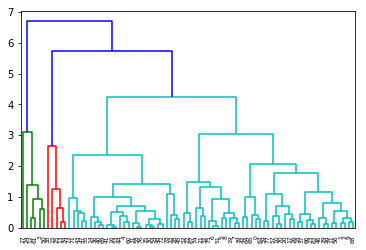

In [11]:
# heirarchical clustering
mergings = linkage(df_cricket_normal, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [17]:
pd.options.display.max_rows=2000
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df, clusterCut], axis=1)
df_hc.columns = ['Player','SR','Ave','ClusterID']

In [18]:
df_hc

,Player,SR,Ave,ClusterID
0,SR Tendulkar (INDIA),86.23,44.83,0
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,0
2,RT Ponting (AUS/ICC),80.39,42.03,0
3,ST Jayasuriya (Asia/SL),91.20,32.36,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,2
5,Inzamam-ul-Haq (Asia/PAK),74.24,39.52,0
6,JH Kallis (Afr/ICC/SA),72.89,44.36,0
7,SC Ganguly (Asia/INDIA),73.70,41.02,0
8,R Dravid (Asia/ICC/INDIA),71.24,39.16,0
9,BC Lara (ICC/WI),79.51,40.48,0
